In [ ]:
# Numerical Methods for computing CDF of Normal

[9.86587645e-10 1.81750786e-09 3.31574598e-09 5.99037140e-09
 1.07175903e-08 1.89895625e-08 3.33204485e-08 5.79013404e-08
 9.96442632e-08 1.69826741e-07]
[6.07588285e-10 1.70916465e-09 3.68648429e-09 7.20043938e-09
 1.33830599e-08 2.41528199e-08 4.27264384e-08 7.44399305e-08
 1.28050284e-07 2.17774636e-07]
[0.00000000e+00 6.07588285e-10 1.70916465e-09 3.68648429e-09
 7.20043938e-09 1.33830599e-08 2.41528199e-08 4.27264384e-08
 7.44399305e-08 1.28050284e-07]
[0.00000000e+00 0.00000000e+00 8.54582324e-10 2.39403033e-09
 5.13966769e-09 9.98795549e-09 1.84641458e-08 3.31358350e-08
 5.82793903e-08 1.00941313e-07]
[0.00000000e+00 8.54582324e-10 2.39403033e-09 5.13966769e-09
 9.98795549e-09 1.84641458e-08 3.31358350e-08 5.82793903e-08
 1.00941313e-07 1.72608666e-07]
[6.07588285e-10 8.54582324e-10 2.39403033e-09 5.13966769e-09
 9.98795549e-09 1.84641458e-08 3.31358350e-08 5.82793903e-08
 1.00941313e-07 1.72608666e-07]
[0.34457826 0.38208858 0.42074029 0.46017216 0.5        0.53982784
 0.579259

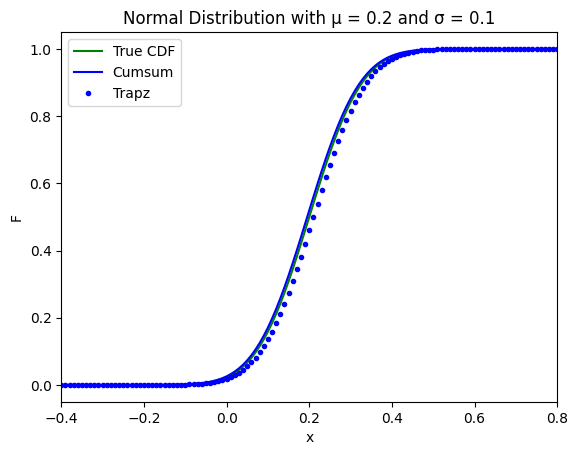

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define the parameters
mu = 0.2  # Mean of the normal distribution
sigma = 0.1  # Standard deviation of the normal distribution
a = -0.4  # Left truncation of the grid
b = 0.8  # Right truncation of the grid
nsteps = 120  # Number of steps in the grid

# Define the grid
deltax = (b - a) / nsteps  # Step size in the grid
x = np.linspace(a, b, nsteps + 1)  # Linearly spaced grid

# Compute the PDF and the CDF of the normal distribution
f = norm.pdf(x, mu, sigma)  # Probability density function
F = norm.cdf(x, mu, sigma)  # Cumulative distribution function

# (a) Approximating the CDF using CumSum
# This method sums up the areas under the PDF to approximate the CDF.
Fa = np.cumsum(f) * deltax

# (b) Using a for loop to approximate the CDF
# This manually sums the areas under the PDF to approximate the CDF.
Fb = np.zeros_like(f)
for i in range(1, len(f)):
    Fb[i] = np.sum(f[:i])
Fb *= deltax

# (c) Using Trapz for a better accuracy in CDF approximation
# The trapezoidal rule is a method for approximating the definite integral.
Fc = np.zeros_like(f)
for i in range(1, len(f)):
    Fc[i] = np.trapz(f[:i])
Fc *= deltax

# (d) Manually implementing the trapezoidal rule
# This manually applies the trapezoidal rule for each step.
Fd = np.zeros_like(f)
Fd[1] = 0.5 * (f[0] + f[1])
for i in range(2, len(f)):
    Fd[i] = Fd[i - 1] + 0.5 * (f[i - 1] + f[i])
Fd *= deltax

# (e) Cumulative sum with adjustment for the trapezoidal rule
# This is a variation of the trapezoidal rule using cumulative sums.
Fe = np.cumsum(f) - 0.5 * (f[0] + f)
Fe[0] = f[0]
Fe *= deltax

# (f) Print first and central elements for comparison
# This section is for inspecting and comparing the first few and central values of the CDF calculated by different methods.
print(F[:10])
print(Fa[:10])
print(Fb[:10])
print(Fc[:10])
print(Fd[:10])
print(Fe[:10])

print(F[nsteps // 2 - 4:nsteps // 2 + 6])
print(Fa[nsteps // 2 - 4:nsteps // 2 + 6])
print(Fb[nsteps // 2 - 4:nsteps // 2 + 6])
print(Fc[nsteps // 2 - 4:nsteps // 2 + 6])
print(Fd[nsteps // 2 - 4:nsteps // 2 + 6])
print(Fe[nsteps // 2 - 4:nsteps // 2 + 6])

# (g) Comparison in a chart
# This plots the CDFs calculated by different methods for visual comparison.
plt.figure(1)
plt.plot(x, F, 'g', x, Fa, 'b', x, Fc, 'b.')
plt.xlim([a, b])
plt.xlabel('x')
plt.ylabel('F')
plt.legend(['True CDF', 'Cumsum', 'Trapz'])
plt.title('Normal Distribution with μ = 0.2 and σ = 0.1')
plt.savefig('normal.pdf')
plt.show()
